<a href="https://colab.research.google.com/github/Klevertak/ssd_keras/blob/master/DSSD_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !pip install keras-resnet

  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-resnet


In [0]:
# import keras_resnet

Using TensorFlow backend.


In [0]:
# import keras_resnet.models

In [0]:
# import keras

In [0]:
# from keras.applications.resnet50 import ResNet50

In [0]:
# shape, classes = (768, 1280, 3), 10

In [0]:
#  x = keras.layers.Input(shape)

In [0]:
# model = keras_resnet.models.ResNet50(x, classes=classes,  include_top=False, freeze_bn=True,)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# resnet50 = ResNet50(weights='imagenet', include_top=False, input_tensor=x)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 39s 0us/step


In [0]:
# resnet50.summary()

In [0]:
# resnet50.get_layer('activation_10').output,resnet50.get_layer('activation_22').output

(<tf.Tensor 'activation_10/Relu:0' shape=(?, 192, 320, 256) dtype=float32>,
 <tf.Tensor 'activation_22/Relu:0' shape=(?, 96, 160, 512) dtype=float32>)

In [0]:
# !wget https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5

In [0]:
# model.load_weights('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5')

In [1]:
!git clone https://github.com/Klevertak/ssd_keras.git
  

Cloning into 'ssd_keras'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 1654 (delta 28), reused 23 (delta 12), pack-reused 1608
Receiving objects: 100% (1654/1654), 21.23 MiB | 37.03 MiB/s, done.
Resolving deltas: 100% (1084/1084), done.


In [2]:
!ls


sample_data  ssd_keras


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# New Section

In [0]:
# !wget http://bit.ly/udacity-annotations-autti

In [4]:
!unzip /content/gdrive/'My Drive'/udacity_driving_datasets.zip

Archive:  /content/gdrive/My Drive/udacity_driving_datasets.zip
   creating: udacity_driving_datasets/
  inflating: udacity_driving_datasets/1478019964687995430.jpg  
  inflating: udacity_driving_datasets/1478019965181415731.jpg  
  inflating: udacity_driving_datasets/1478019975180844551.jpg  
  inflating: udacity_driving_datasets/1478020202188709849.jpg  
  inflating: udacity_driving_datasets/1478020207697385417.jpg  
  inflating: udacity_driving_datasets/1478020210691558747.jpg  
  inflating: udacity_driving_datasets/1478020213196446056.jpg  
  inflating: udacity_driving_datasets/1478020219199183180.jpg  
  inflating: udacity_driving_datasets/1478020221697381210.jpg  
  inflating: udacity_driving_datasets/1478020232692272848.jpg  
  inflating: udacity_driving_datasets/1478020251190269468.jpg  
  inflating: udacity_driving_datasets/1478020253690036656.jpg  
  inflating: udacity_driving_datasets/1478020259694436222.jpg  
  inflating: udacity_driving_datasets/1478020267198258485.jpg  
 

In [0]:
!ls udacity_driving_datasets/*.csv

udacity_driving_datasets/labels_train.csv
udacity_driving_datasets/labels_trainval.csv
udacity_driving_datasets/labels_val.csv


In [0]:
import os

In [0]:
os.chdir('ssd_keras')

In [7]:
!ls

bounding_box_utils   models
CONTRIBUTING.md      README.md
data_generator	     ssd300_evaluation_COCO.ipynb
DSSD_test.ipynb      ssd300_evaluation.ipynb
eval_utils	     ssd300_inference.ipynb
examples	     ssd300_training.ipynb
__init__.py	     ssd512_inference.ipynb
ISSUE_TEMPLATE.md    ssd7_training.ipynb
keras_layers	     ssd_encoder_decoder
keras_loss_function  training_summaries
LICENSE.txt	     weight_sampling_tutorial.ipynb
misc_utils


In [8]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TerminateOnNaN, CSVLogger
from keras import backend as K
from keras.models import load_model
from math import ceil
import numpy as np
from matplotlib import pyplot as plt

from models.keras_ssd7 import build_model
from keras_loss_function.keras_ssd_loss import SSDLoss
from keras_layers.keras_layer_AnchorBoxes import AnchorBoxes
from keras_layers.keras_layer_DecodeDetections import DecodeDetections
from keras_layers.keras_layer_DecodeDetectionsFast import DecodeDetectionsFast

from ssd_encoder_decoder.ssd_input_encoder import SSDInputEncoder
from ssd_encoder_decoder.ssd_output_decoder import decode_detections, decode_detections_fast

from data_generator.object_detection_2d_data_generator import DataGenerator
from data_generator.object_detection_2d_misc_utils import apply_inverse_transforms
from data_generator.data_augmentation_chain_variable_input_size import DataAugmentationVariableInputSize
from data_generator.data_augmentation_chain_constant_input_size import DataAugmentationConstantInputSize
from data_generator.data_augmentation_chain_original_ssd import SSDDataAugmentation

%matplotlib inline

Using TensorFlow backend.


In [0]:
img_height = 300 # Height of the input images
img_width = 480 # Width of the input images
img_channels = 3 # Number of color channels of the input images
intensity_mean = 127.5 # Set this to your preference (maybe `None`). The current settings transform the input pixel values to the interval `[-1,1]`.
intensity_range = 127.5 # Set this to your preference (maybe `None`). The current settings transform the input pixel values to the interval `[-1,1]`.
n_classes = 5 # Number of positive classes
scales = [0.08, 0.16, 0.32, 0.64, 0.96] # An explicit list of anchor box scaling factors. If this is passed, it will override `min_scale` and `max_scale`.
aspect_ratios = [0.5, 1.0, 2.0] # The list of aspect ratios for the anchor boxes
two_boxes_for_ar1 = True # Whether or not you want to generate two anchor boxes for aspect ratio 1
steps = None # In case you'd like to set the step sizes for the anchor box grids manually; not recommended
offsets = None # In case you'd like to set the offsets for the anchor box grids manually; not recommended
clip_boxes = False # Whether or not to clip the anchor boxes to lie entirely within the image boundaries
variances = [1.0, 1.0, 1.0, 1.0] # The list of variances by which the encoded target coordinates are scaled
normalize_coords = True # Whether or not the model is supposed to use coordinates relative to the image size

## Original SSD

In [10]:
# 1: Build the Keras model

K.clear_session() # Clear previous models from memory.

model = build_model(image_size=(img_height, img_width, img_channels),
                    n_classes=n_classes,
                    mode='training',
                    l2_regularization=0.0005,
                    scales=scales,
                    aspect_ratios_global=aspect_ratios,
                    aspect_ratios_per_layer=None,
                    two_boxes_for_ar1=two_boxes_for_ar1,
                    steps=steps,
                    offsets=offsets,
                    clip_boxes=clip_boxes,
                    variances=variances,
                    normalize_coords=normalize_coords,
                    subtract_mean=intensity_mean,
                    divide_by_stddev=intensity_range)

# 2: Optional: Load some weights

#model.load_weights('./ssd7_weights.h5', by_name=True)

# 3: Instantiate an Adam optimizer and the SSD loss function and compile the model

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

ssd_loss = SSDLoss(neg_pos_ratio=3, alpha=1.0)

model.compile(optimizer=adam, loss=ssd_loss.compute_loss, metrics=[])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


In [0]:
!ls ../

gdrive	sample_data  ssd_keras


In [11]:
 #1: Instantiate two `DataGenerator` objects: One for training, one for validation.

# Optional: If you have enough memory, consider loading the images into memory for the reasons explained above.

train_dataset = DataGenerator(load_images_into_memory=False, hdf5_dataset_path=None)
val_dataset = DataGenerator(load_images_into_memory=False, hdf5_dataset_path=None)

# 2: Parse the image and label lists for the training and validation datasets.

# TODO: Set the paths to your dataset here.

# Images
images_dir = '../udacity_driving_datasets/'

# Ground truth
train_labels_filename = '../udacity_driving_datasets/labels_train.csv'
val_labels_filename   = '../udacity_driving_datasets/labels_val.csv'

train_dataset.parse_csv(images_dir=images_dir,
                        labels_filename=train_labels_filename,
                        input_format=['image_name', 'xmin', 'xmax', 'ymin', 'ymax', 'class_id'], # This is the order of the first six columns in the CSV file that contains the labels for your dataset. If your labels are in XML format, maybe the XML parser will be helpful, check the documentation.
                        include_classes='all')

val_dataset.parse_csv(images_dir=images_dir,
                      labels_filename=val_labels_filename,
                      input_format=['image_name', 'xmin', 'xmax', 'ymin', 'ymax', 'class_id'],
                      include_classes='all')

# Optional: Convert the dataset into an HDF5 dataset. This will require more disk space, but will
# speed up the training. Doing this is not relevant in case you activated the `load_images_into_memory`
# option in the constructor, because in that cas the images are in memory already anyway. If you don't
# want to create HDF5 datasets, comment out the subsequent two function calls.

train_dataset.create_hdf5_dataset(file_path='dataset_udacity_traffic_train.h5',
                                  resize=False,
                                  variable_image_size=True,
                                  verbose=True)

val_dataset.create_hdf5_dataset(file_path='dataset_udacity_traffic_val.h5',
                                resize=False,
                                variable_image_size=True,
                                verbose=True)

# Get the number of samples in the training and validations datasets.
train_dataset_size = train_dataset.get_dataset_size()
val_dataset_size   = val_dataset.get_dataset_size()

print("Number of images in the training dataset:\t{:>6}".format(train_dataset_size))
print("Number of images in the validation dataset:\t{:>6}".format(val_dataset_size))

Creating HDF5 dataset: 100%|██████████| 4241/4241 [00:28<00:00, 113.91it/s]
Number of images in the training dataset:	 18000
Number of images in the validation dataset:	  4241


In [0]:
# 3: Set the batch size.

batch_size = 16

# 4: Define the image processing chain.

data_augmentation_chain = DataAugmentationConstantInputSize(random_brightness=(-48, 48, 0.5),
                                                            random_contrast=(0.5, 1.8, 0.5),
                                                            random_saturation=(0.5, 1.8, 0.5),
                                                            random_hue=(18, 0.5),
                                                            random_flip=0.5,
                                                            random_translate=((0.03,0.5), (0.03,0.5), 0.5),
                                                            random_scale=(0.5, 2.0, 0.5),
                                                            n_trials_max=3,
                                                            clip_boxes=True,
                                                            overlap_criterion='area',
                                                            bounds_box_filter=(0.3, 1.0),
                                                            bounds_validator=(0.5, 1.0),
                                                            n_boxes_min=1,
                                                            background=(0,0,0))

# 5: Instantiate an encoder that can encode ground truth labels into the format needed by the SSD loss function.

# The encoder constructor needs the spatial dimensions of the model's predictor layers to create the anchor boxes.
predictor_sizes = [model.get_layer('classes4').output_shape[1:3],
                   model.get_layer('classes5').output_shape[1:3],
                   model.get_layer('classes6').output_shape[1:3],
                   model.get_layer('classes7').output_shape[1:3]]

ssd_input_encoder = SSDInputEncoder(img_height=img_height,
                                    img_width=img_width,
                                    n_classes=n_classes,
                                    predictor_sizes=predictor_sizes,
                                    scales=scales,
                                    aspect_ratios_global=aspect_ratios,
                                    two_boxes_for_ar1=two_boxes_for_ar1,
                                    steps=steps,
                                    offsets=offsets,
                                    clip_boxes=clip_boxes,
                                    variances=variances,
                                    matching_type='multi',
                                    pos_iou_threshold=0.5,
                                    neg_iou_limit=0.3,
                                    normalize_coords=normalize_coords)

# 6: Create the generator handles that will be passed to Keras' `fit_generator()` function.

train_generator = train_dataset.generate(batch_size=batch_size,
                                         shuffle=True,
                                         transformations=[data_augmentation_chain],
                                         label_encoder=ssd_input_encoder,
                                         returns={'processed_images',
                                                  'encoded_labels'},
                                         keep_images_without_gt=False)

val_generator = val_dataset.generate(batch_size=batch_size,
                                     shuffle=False,
                                     transformations=[],
                                     label_encoder=ssd_input_encoder,
                                     returns={'processed_images',
                                              'encoded_labels'},
                                     keep_images_without_gt=False)

In [13]:
# Define model callbacks.

# TODO: Set the filepath under which you want to save the weights.
model_checkpoint = ModelCheckpoint(filepath='ssd7_epoch-{epoch:02d}_loss-{loss:.4f}_val_loss-{val_loss:.4f}.h5',
                                   monitor='val_loss',
                                   verbose=1,
                                   save_best_only=True,
                                   save_weights_only=False,
                                   mode='auto',
                                   period=1)

csv_logger = CSVLogger(filename='ssd7_training_log.csv',
                       separator=',',
                       append=True)

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0.0,
                               patience=10,
                               verbose=1)

reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss',
                                         factor=0.2,
                                         patience=8,
                                         verbose=1,
                                         epsilon=0.001,
                                         cooldown=0,
                                         min_lr=0.00001)

callbacks = [model_checkpoint,
             csv_logger,
             early_stopping,
             reduce_learning_rate]

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [16]:
# TODO: Set the epochs to train for.
# If you're resuming a previous training, set `initial_epoch` and `final_epoch` accordingly.
initial_epoch   = 0
final_epoch     = 5
steps_per_epoch = 1000

history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=steps_per_epoch,
                              epochs=final_epoch,
                              callbacks=callbacks,
                              validation_data=val_generator,
                              validation_steps=ceil(val_dataset_size/batch_size),
                              initial_epoch=initial_epoch)



Epoch 1/5
1000/1000 [==============================] - 529s 529ms/step - loss: 2.2444 - val_loss: 2.3980

Epoch 00001: val_loss did not improve from 2.38770
Epoch 2/5
1000/1000 [==============================] - 524s 524ms/step - loss: 2.2335 - val_loss: 2.4892

Epoch 00002: val_loss did not improve from 2.38770
Epoch 3/5
1000/1000 [==============================] - 515s 515ms/step - loss: 2.2110 - val_loss: 2.4189

Epoch 00003: val_loss did not improve from 2.38770
Epoch 4/5
1000/1000 [==============================] - 515s 515ms/step - loss: 2.1879 - val_loss: 2.6312

Epoch 00004: val_loss did not improve from 2.38770
Epoch 5/5
1000/1000 [==============================] - 523s 523ms/step - loss: 2.1685 - val_loss: 2.4131

Epoch 00005: val_loss did not improve from 2.38770


In [0]:
# !ls ../datasets

udacity_driving_datasets


In [0]:
# !mv ../udacity_driving_datasets ../datasets

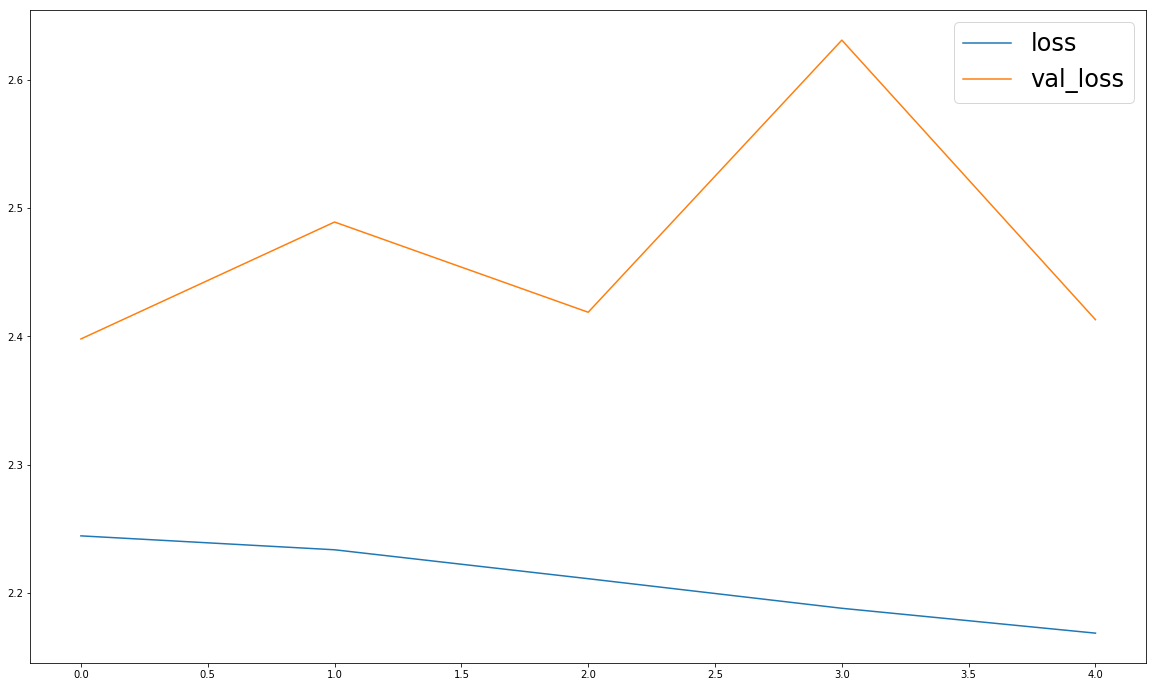

In [17]:
plt.figure(figsize=(20,12))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='upper right', prop={'size': 24});

In [0]:
# 1: Set the generator for the predictions.

predict_generator = val_dataset.generate(batch_size=1,
                                         shuffle=True,
                                         transformations=[],
                                         label_encoder=None,
                                         returns={'processed_images',
                                                  'processed_labels',
                                                  'filenames'},
                                         keep_images_without_gt=False)

In [24]:
# 2: Generate samples

batch_images, batch_labels, batch_filenames = next(predict_generator)

i = 0 # Which batch item to look at

print("Image:", batch_filenames[i])
print()
print("Ground truth boxes:\n")
print(batch_labels[i])

Image: ../udacity_driving_datasets/1478900055605980827.jpg

Ground truth boxes:

[[  1  88 136 233 188]
 [  5  93 114  99 129]
 [  5 328  97 335 114]]


In [0]:


# 3: Make a prediction

y_pred = model.predict(batch_images)



In [26]:
# 4: Decode the raw prediction `y_pred`

y_pred_decoded = decode_detections(y_pred,
                                   confidence_thresh=0.5,
                                   iou_threshold=0.45,
                                   top_k=200,
                                   normalize_coords=normalize_coords,
                                   img_height=img_height,
                                   img_width=img_width)

np.set_printoptions(precision=2, suppress=True, linewidth=90)
print("Predicted boxes:\n")
print('   class   conf xmin   ymin   xmax   ymax')
print(y_pred_decoded[i])

Predicted boxes:

   class   conf xmin   ymin   xmax   ymax
[[  1.     0.84 106.39 125.12 241.66 178.64]
 [  1.     0.71 179.86 134.59 235.64 181.67]]


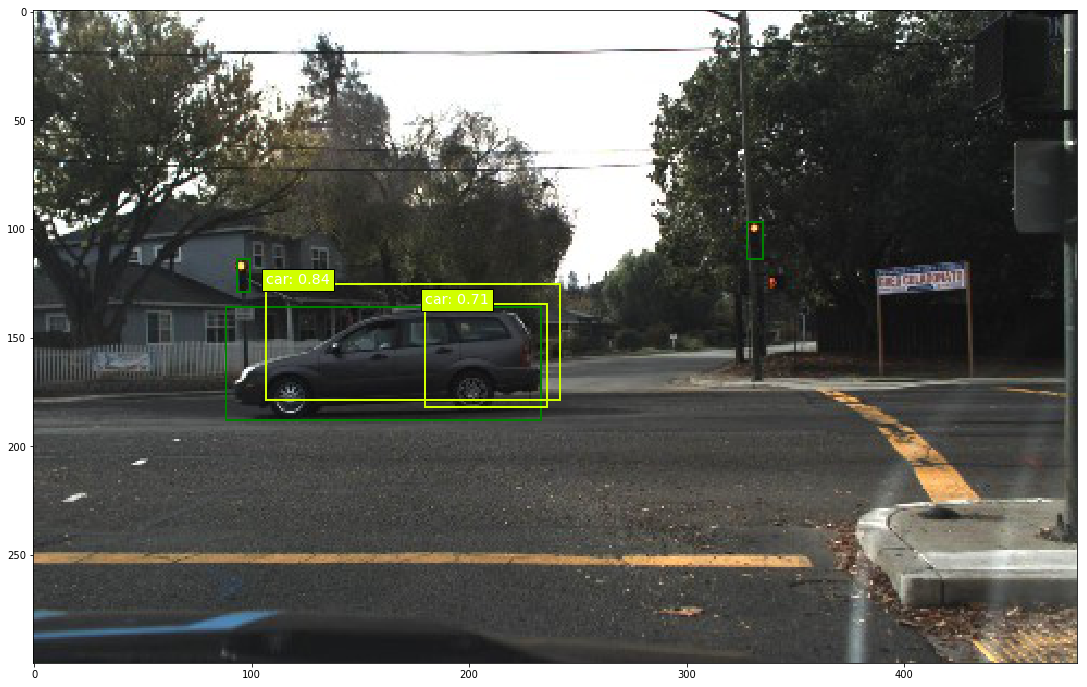

In [27]:
# 5: Draw the predicted boxes onto the image

plt.figure(figsize=(20,12))
plt.imshow(batch_images[i])

current_axis = plt.gca()

colors = plt.cm.hsv(np.linspace(0, 1, n_classes+1)).tolist() # Set the colors for the bounding boxes
classes = ['background', 'car', 'truck', 'pedestrian', 'bicyclist', 'light'] # Just so we can print class names onto the image instead of IDs

# Draw the ground truth boxes in green (omit the label for more clarity)
for box in batch_labels[i]:
    xmin = box[1]
    ymin = box[2]
    xmax = box[3]
    ymax = box[4]
    label = '{}'.format(classes[int(box[0])])
    current_axis.add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='green', fill=False, linewidth=2))  
    #current_axis.text(xmin, ymin, label, size='x-large', color='white', bbox={'facecolor':'green', 'alpha':1.0})

# Draw the predicted boxes in blue
for box in y_pred_decoded[i]:
    xmin = box[-4]
    ymin = box[-3]
    xmax = box[-2]
    ymax = box[-1]
    color = colors[int(box[0])]
    label = '{}: {:.2f}'.format(classes[int(box[0])], box[1])
    current_axis.add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color=color, fill=False, linewidth=2))  
    current_axis.text(xmin, ymin, label, size='x-large', color='white', bbox={'facecolor':color, 'alpha':1.0})

In [0]:
!git pull

remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 1), reused 3 (delta 1), pack-reused 0
Unpacking objects: 100% (6/6), done.
From https://github.com/Klevertak/ssd_keras
   a9647ff..7376a17  master     -> origin/master
Updating a9647ff..7376a17
Fast-forward
 models/keras_dssd7.py | 10 +++++-----
 1 file changed, 5 insertions(+), 5 deletions(-)


In [0]:
!ls -ltr models
 

total 188
-rw-r--r-- 1 root root     0 May 16 07:54 __init__.py
-rw-r--r-- 1 root root 36882 May 16 07:54 keras_ssd512.py
-rw-r--r-- 1 root root 34747 May 16 07:54 keras_ssd300.py
-rw-r--r-- 1 root root 39865 May 16 07:54 keras_dssd512.py
-rw-r--r-- 1 root root 30149 May 16 07:54 keras_ssd7.py
drwxr-xr-x 2 root root  4096 May 16 09:05 __pycache__
-rw-r--r-- 1 root root 35170 May 16 09:37 keras_dssd7.py


## **Test DSSD model**

In [0]:
from models.keras_dssd7 import build_dssd7_model

In [0]:
img_height = 300 # Height of the input images
img_width = 480 # Width of the input images
img_channels = 3 # Number of color channels of the input images
intensity_mean = 127.5 # Set this to your preference (maybe `None`). The current settings transform the input pixel values to the interval `[-1,1]`.
intensity_range = 127.5 # Set this to your preference (maybe `None`). The current settings transform the input pixel values to the interval `[-1,1]`.
n_classes = 5 # Number of positive classes
scales = [0.08, 0.16, 0.32, 0.64, 0.96] # An explicit list of anchor box scaling factors. If this is passed, it will override `min_scale` and `max_scale`.
aspect_ratios = [0.5, 1.0, 2.0] # The list of aspect ratios for the anchor boxes
two_boxes_for_ar1 = True # Whether or not you want to generate two anchor boxes for aspect ratio 1
steps = None # In case you'd like to set the step sizes for the anchor box grids manually; not recommended
offsets = None # In case you'd like to set the offsets for the anchor box grids manually; not recommended
clip_boxes = False # Whether or not to clip the anchor boxes to lie entirely within the image boundaries
variances = [1.0, 1.0, 1.0, 1.0] # The list of variances by which the encoded target coordinates are scaled
normalize_coords = True # Whether or not the model is supposed to use coordinates relative to the image size

In [0]:
# 1: Build the Keras model

K.clear_session() # Clear previous models from memory.

model_dssd = build_dssd7_model(image_size=(img_height, img_width, img_channels),
                    n_classes=n_classes,
                    mode='training',
                    l2_regularization=0.0005,
                    scales=scales,
                    aspect_ratios_global=aspect_ratios,
                    aspect_ratios_per_layer=None,
                    two_boxes_for_ar1=two_boxes_for_ar1,
                    steps=steps,
                    offsets=offsets,
                    clip_boxes=clip_boxes,
                    variances=variances,
                    normalize_coords=normalize_coords,
                    subtract_mean=intensity_mean,
                    divide_by_stddev=intensity_range)

# 2: Optional: Load some weights

#model.load_weights('./ssd7_weights.h5', by_name=True)

# 3: Instantiate an Adam optimizer and the SSD loss function and compile the model

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

ssd_loss = SSDLoss(neg_pos_ratio=3, alpha=1.0)

model_dssd.compile(optimizer=adam, loss=ssd_loss.compute_loss)

In [0]:
model_dssd.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 300, 480, 3)  0                                            
__________________________________________________________________________________________________
identity_layer (Lambda)         (None, 300, 480, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
input_mean_normalization (Lambd (None, 300, 480, 3)  0           identity_layer[0][0]             
__________________________________________________________________________________________________
input_stddev_normalization (Lam (None, 300, 480, 3)  0           input_mean_normalization[0][0]   
__________________________________________________________________________________________________
conv1 (Con

In [0]:
# If you're resuming a previous training, set `initial_epoch` and `final_epoch` accordingly.
initial_epoch   = 0
final_epoch     = 5
steps_per_epoch = 1000

history_dssd = model_dssd.fit_generator(generator=train_generator,
                              steps_per_epoch=steps_per_epoch,
                              epochs=final_epoch,
                              callbacks=callbacks,
                              validation_data=val_generator,
                              validation_steps=ceil(val_dataset_size/batch_size),
                              initial_epoch=initial_epoch)

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/5
1000/1000 [==============================] - 620s 620ms/step - loss: 3.7497 - val_loss: 3.0807

Epoch 00001: val_loss improved from inf to 3.08071, saving model to ssd7_epoch-01_loss-3.7497_val_loss-3.0807.h5
Epoch 2/5
1000/1000 [==============================] - 600s 600ms/step - loss: 2.7619 - val_loss: 2.6951

Epoch 00002: val_loss improved from 3.08071 to 2.69510, saving model to ssd7_epoch-02_loss-2.7619_val_loss-2.6951.h5
Epoch 3/5
1000/1000 [==============================] - 601s 601ms/step - loss: 2.4157 - val_loss: 2.4578

Epoch 00003: val_loss improved from 2.69510 to 2.45784, saving model to ssd7_epoch-03_loss-2.4157_val_loss-2.4578.h5
Epoch 4/5
1000/1000 [==============================] - 602s 602ms/step - loss: 2.2489 - val_loss: 2.4400

Epoch 00004: val_loss improved from 2.45784 to 2.44003, saving model to ssd7_epoch-04_loss-2.2489_val_loss-2.4400.h5
Epoch 5/5
1000/1000 [=============

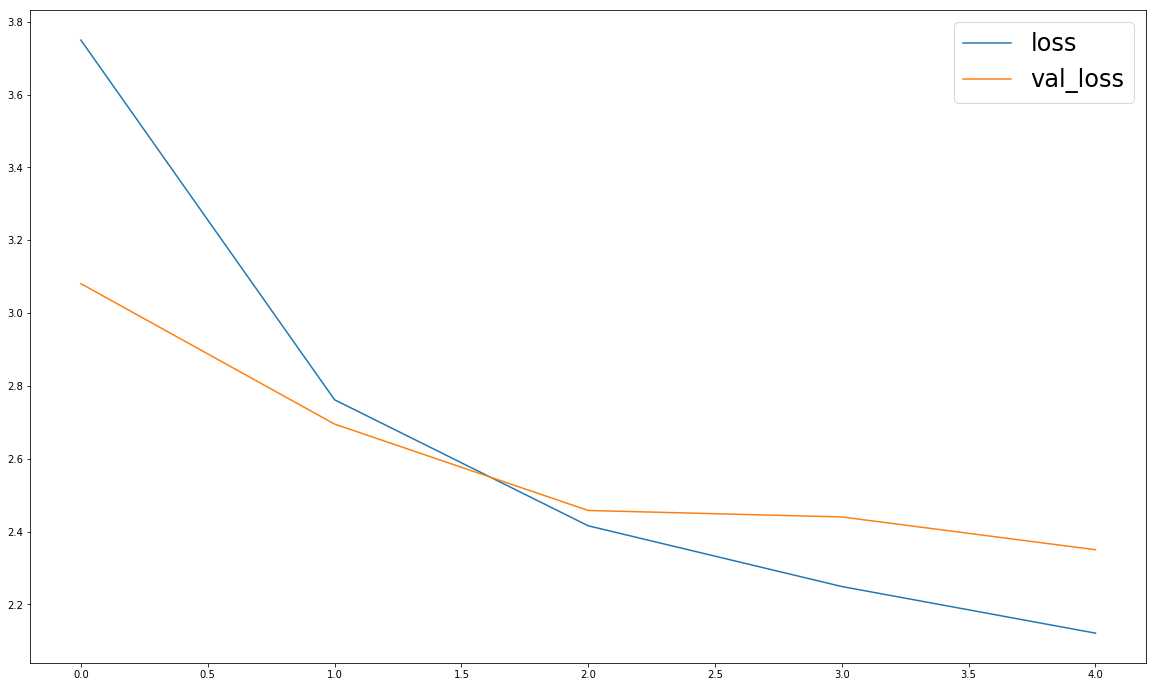

In [0]:
plt.figure(figsize=(20,12))
plt.plot(history_dssd.history['loss'], label='loss')
plt.plot(history_dssd.history['val_loss'], label='val_loss')
plt.legend(loc='upper right', prop={'size': 24});

In [0]:
# 1: Set the generator for the predictions.

predict_generator = val_dataset.generate(batch_size=1,
                                         shuffle=True,
                                         transformations=[],
                                         label_encoder=None,
                                         returns={'processed_images',
                                                  'processed_labels',
                                                  'filenames'},
                                         keep_images_without_gt=False)

In [0]:


# 2: Generate samples

batch_images, batch_labels, batch_filenames = next(predict_generator)

i = 0 # Which batch item to look at

print("Image:", batch_filenames[i])
print()
print("Ground truth boxes:\n")
print(batch_labels[i])



Image: ../udacity_driving_datasets/1478901327868551889.jpg

Ground truth boxes:

[[  1   0 148  14 194]
 [  1   0 150  18 196]
 [  1  11 146  76 200]
 [  1  58 114 214 241]
 [  1 237 149 256 166]
 [  1 247 147 289 167]
 [  1 294 142 375 196]
 [  2  10 137  62 163]
 [  3 296 148 305 165]
 [  3 297 149 304 161]
 [  3 454 144 469 180]
 [  5 148  91 157 106]
 [  5 195  91 202 103]
 [  5 232  90 240 105]
 [  5 322 118 330 131]
 [  5 434  52 458  97]]


In [0]:
# 3: Make a prediction

y_pred_dssd = model_dssd.predict(batch_images)

In [0]:


# 4: Decode the raw prediction `y_pred`

y_pred__dssd_decoded = decode_detections(y_pred_dssd,
                                   confidence_thresh=0.5,
                                   iou_threshold=0.45,
                                   top_k=200,
                                   normalize_coords=normalize_coords,
                                   img_height=img_height,
                                   img_width=img_width)

np.set_printoptions(precision=2, suppress=True, linewidth=90)
print("Predicted boxes:\n")
print('   class   conf xmin   ymin   xmax   ymax')
print(y_pred__dssd_decoded[i])



Predicted boxes:

   class   conf xmin   ymin   xmax   ymax
[[  1.     1.    83.7  138.73 223.9  280.06]
 [  1.     0.99  64.12 106.41 200.18 234.41]
 [  1.     0.92 303.53 130.44 367.93 185.08]
 [  1.     0.68 251.59 147.98 284.13 167.18]
 [  1.     0.57 237.13 148.85 267.68 166.4 ]]


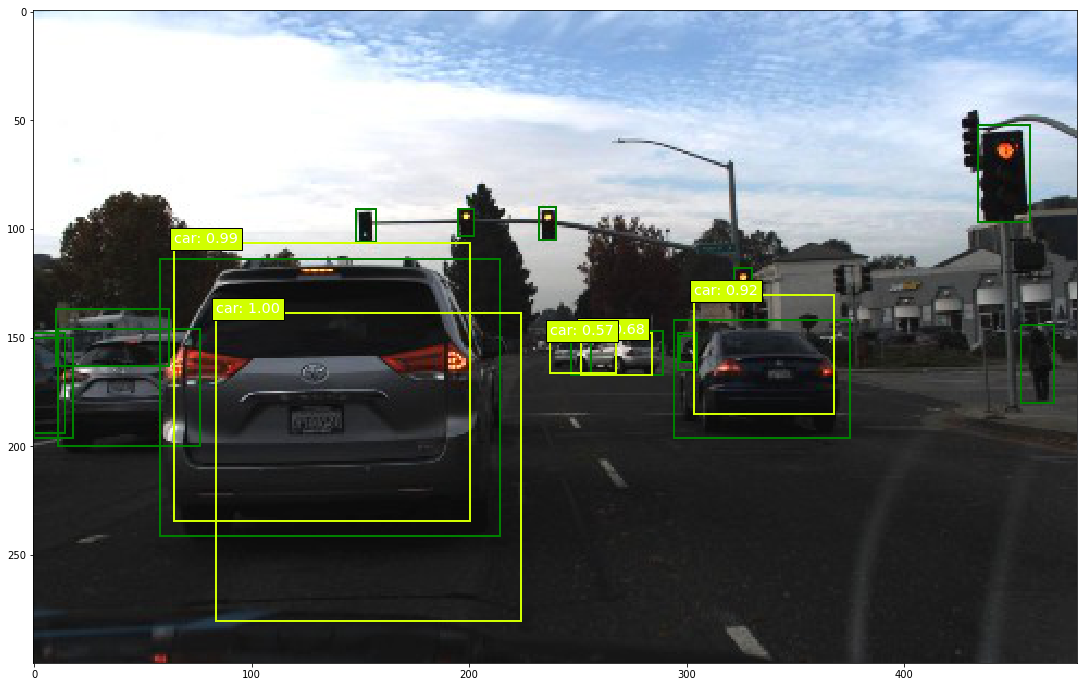

In [0]:
# 5: Draw the predicted boxes onto the image

plt.figure(figsize=(20,12))
plt.imshow(batch_images[i])

current_axis = plt.gca()

colors = plt.cm.hsv(np.linspace(0, 1, n_classes+1)).tolist() # Set the colors for the bounding boxes
classes = ['background', 'car', 'truck', 'pedestrian', 'bicyclist', 'light'] # Just so we can print class names onto the image instead of IDs

# Draw the ground truth boxes in green (omit the label for more clarity)
for box in batch_labels[i]:
    xmin = box[1]
    ymin = box[2]
    xmax = box[3]
    ymax = box[4]
    label = '{}'.format(classes[int(box[0])])
    current_axis.add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='green', fill=False, linewidth=2))  
    #current_axis.text(xmin, ymin, label, size='x-large', color='white', bbox={'facecolor':'green', 'alpha':1.0})

# Draw the predicted boxes in blue
for box in y_pred__dssd_decoded[i]:
    xmin = box[-4]
    ymin = box[-3]
    xmax = box[-2]
    ymax = box[-1]
    color = colors[int(box[0])]
    label = '{}: {:.2f}'.format(classes[int(box[0])], box[1])
    current_axis.add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color=color, fill=False, linewidth=2))  
    current_axis.text(xmin, ymin, label, size='x-large', color='white', bbox={'facecolor':color, 'alpha':1.0})

## Test DSSD retinanet

In [0]:
from models.keras_dssd_resnet import build_dssd_resnet_model

In [0]:
# 1: Build the Keras model

K.clear_session() # Clear previous models from memory.

model_dssd_resnet = build_dssd_resnet_model(image_size=(img_height, img_width, img_channels),
                    n_classes=n_classes,
                    mode='training',
                    l2_regularization=0.0005,
                    scales=scales,
                    aspect_ratios_global=aspect_ratios,
                    aspect_ratios_per_layer=None,
                    two_boxes_for_ar1=two_boxes_for_ar1,
                    steps=steps,
                    offsets=offsets,
                    clip_boxes=clip_boxes,
                    variances=variances,
                    normalize_coords=normalize_coords,
                    subtract_mean=intensity_mean,
                    divide_by_stddev=intensity_range)

# 2: Optional: Load some weights

#model.load_weights('./ssd7_weights.h5', by_name=True)

# 3: Instantiate an Adam optimizer and the SSD loss function and compile the model

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

ssd_loss = SSDLoss(neg_pos_ratio=3, alpha=1.0)

model_dssd_resnet.compile(optimizer=adam, loss=ssd_loss.compute_loss)

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


In [0]:
 #1: Instantiate two `DataGenerator` objects: One for training, one for validation.

# Optional: If you have enough memory, consider loading the images into memory for the reasons explained above.

train_dataset = DataGenerator(load_images_into_memory=False, hdf5_dataset_path=None)
val_dataset = DataGenerator(load_images_into_memory=False, hdf5_dataset_path=None)

# 2: Parse the image and label lists for the training and validation datasets.

# TODO: Set the paths to your dataset here.

# Images
images_dir = '../udacity_driving_datasets/'

# Ground truth
train_labels_filename = '../udacity_driving_datasets/labels_train.csv'
val_labels_filename   = '../udacity_driving_datasets/labels_val.csv'

train_dataset.parse_csv(images_dir=images_dir,
                        labels_filename=train_labels_filename,
                        input_format=['image_name', 'xmin', 'xmax', 'ymin', 'ymax', 'class_id'], # This is the order of the first six columns in the CSV file that contains the labels for your dataset. If your labels are in XML format, maybe the XML parser will be helpful, check the documentation.
                        include_classes='all')

val_dataset.parse_csv(images_dir=images_dir,
                      labels_filename=val_labels_filename,
                      input_format=['image_name', 'xmin', 'xmax', 'ymin', 'ymax', 'class_id'],
                      include_classes='all')

# Optional: Convert the dataset into an HDF5 dataset. This will require more disk space, but will
# speed up the training. Doing this is not relevant in case you activated the `load_images_into_memory`
# option in the constructor, because in that cas the images are in memory already anyway. If you don't
# want to create HDF5 datasets, comment out the subsequent two function calls.

train_dataset.create_hdf5_dataset(file_path='dataset_udacity_traffic_train.h5',
                                  resize=False,
                                  variable_image_size=True,
                                  verbose=True)

val_dataset.create_hdf5_dataset(file_path='dataset_udacity_traffic_val.h5',
                                resize=False,
                                variable_image_size=True,
                                verbose=True)

# Get the number of samples in the training and validations datasets.
train_dataset_size = train_dataset.get_dataset_size()
val_dataset_size   = val_dataset.get_dataset_size()

print("Number of images in the training dataset:\t{:>6}".format(train_dataset_size))
print("Number of images in the validation dataset:\t{:>6}".format(val_dataset_size))

Creating HDF5 dataset: 100%|██████████| 4241/4241 [00:28<00:00, 146.36it/s]
Number of images in the training dataset:	 18000
Number of images in the validation dataset:	  4241


In [0]:
# 3: Set the batch size.

batch_size = 16

# 4: Define the image processing chain.

data_augmentation_chain = DataAugmentationConstantInputSize(random_brightness=(-48, 48, 0.5),
                                                            random_contrast=(0.5, 1.8, 0.5),
                                                            random_saturation=(0.5, 1.8, 0.5),
                                                            random_hue=(18, 0.5),
                                                            random_flip=0.5,
                                                            random_translate=((0.03,0.5), (0.03,0.5), 0.5),
                                                            random_scale=(0.5, 2.0, 0.5),
                                                            n_trials_max=3,
                                                            clip_boxes=True,
                                                            overlap_criterion='area',
                                                            bounds_box_filter=(0.3, 1.0),
                                                            bounds_validator=(0.5, 1.0),
                                                            n_boxes_min=1,
                                                            background=(0,0,0))

# 5: Instantiate an encoder that can encode ground truth labels into the format needed by the SSD loss function.

# The encoder constructor needs the spatial dimensions of the model's predictor layers to create the anchor boxes.
predictor_sizes = [model_dssd_resnet.get_layer('classes4').output_shape[1:3],
                   model_dssd_resnet.get_layer('classes5').output_shape[1:3],
                   model_dssd_resnet.get_layer('classes6').output_shape[1:3],
                   model_dssd_resnet.get_layer('classes7').output_shape[1:3]]

ssd_input_encoder = SSDInputEncoder(img_height=img_height,
                                    img_width=img_width,
                                    n_classes=n_classes,
                                    predictor_sizes=predictor_sizes,
                                    scales=scales,
                                    aspect_ratios_global=aspect_ratios,
                                    two_boxes_for_ar1=two_boxes_for_ar1,
                                    steps=steps,
                                    offsets=offsets,
                                    clip_boxes=clip_boxes,
                                    variances=variances,
                                    matching_type='multi',
                                    pos_iou_threshold=0.5,
                                    neg_iou_limit=0.3,
                                    normalize_coords=normalize_coords)

# 6: Create the generator handles that will be passed to Keras' `fit_generator()` function.

train_generator = train_dataset.generate(batch_size=batch_size,
                                         shuffle=True,
                                         transformations=[data_augmentation_chain],
                                         label_encoder=ssd_input_encoder,
                                         returns={'processed_images',
                                                  'encoded_labels'},
                                         keep_images_without_gt=False)

val_generator = val_dataset.generate(batch_size=batch_size,
                                     shuffle=False,
                                     transformations=[],
                                     label_encoder=ssd_input_encoder,
                                     returns={'processed_images',
                                              'encoded_labels'},
                                     keep_images_without_gt=False)

In [0]:
# Define model callbacks.

# TODO: Set the filepath under which you want to save the weights.
model_checkpoint = ModelCheckpoint(filepath='ssd7_epoch-{epoch:02d}_loss-{loss:.4f}_val_loss-{val_loss:.4f}.h5',
                                   monitor='val_loss',
                                   verbose=1,
                                   save_best_only=True,
                                   save_weights_only=False,
                                   mode='auto',
                                   period=1)

csv_logger = CSVLogger(filename='ssd7_training_log.csv',
                       separator=',',
                       append=True)

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0.0,
                               patience=10,
                               verbose=1)

reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss',
                                         factor=0.2,
                                         patience=8,
                                         verbose=1,
                                         epsilon=0.001,
                                         cooldown=0,
                                         min_lr=0.00001)

callbacks = [model_checkpoint,
             csv_logger,
             early_stopping,
             reduce_learning_rate]

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [0]:
model_dssd_resnet.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 300, 480, 3)  0                                            
__________________________________________________________________________________________________
identity_layer (Lambda)         (None, 300, 480, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
input_mean_normalization (Lambd (None, 300, 480, 3)  0           identity_layer[0][0]             
__________________________________________________________________________________________________
input_stddev_normalization (Lam (None, 300, 480, 3)  0           input_mean_normalization[0][0]   
__________________________________________________________________________________________________
conv1_pad 

In [0]:
# If you're resuming a previous training, set `initial_epoch` and `final_epoch` accordingly.
initial_epoch   = 0
final_epoch     = 5
steps_per_epoch = 5000

history_dssd_resnet = model_dssd_resnet.fit_generator(generator=train_generator,
                              steps_per_epoch=steps_per_epoch,
                              epochs=final_epoch,
                              callbacks=callbacks,
                              validation_data=val_generator,
                              validation_steps=ceil(val_dataset_size/batch_size),
                              initial_epoch=initial_epoch)

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/5
5000/5000 [==============================] - 7179s 1s/step - loss: 2.5272 - val_loss: 10.6123

Epoch 00001: val_loss improved from inf to 10.61229, saving model to ssd7_epoch-01_loss-2.5272_val_loss-10.6123.h5
Epoch 2/5
5000/5000 [==============================] - 7167s 1s/step - loss: 2.1730 - val_loss: 8.4187

Epoch 00002: val_loss improved from 10.61229 to 8.41874, saving model to ssd7_epoch-02_loss-2.1730_val_loss-8.4187.h5
Epoch 3/5
1568/5000 [========>.....................] - ETA: 1:18:34 - loss: 2.0609

KeyboardInterrupt: ignored

In [0]:
plt.figure(figsize=(20,12))
plt.plot(history_dssd_resnet.history['loss'], label='loss')
plt.plot(history_dssd_resnet.history['val_loss'], label='val_loss')
plt.legend(loc='upper right', prop={'size': 24});

NameError: ignored

<Figure size 1440x864 with 0 Axes>

In [0]:
# 1: Set the generator for the predictions.

predict_generator = val_dataset.generate(batch_size=1,
                                         shuffle=True,
                                         transformations=[],
                                         label_encoder=None,
                                         returns={'processed_images',
                                                  'processed_labels',
                                                  'filenames'},
                                         keep_images_without_gt=False)

In [0]:

# 2: Generate samples

batch_images, batch_labels, batch_filenames = next(predict_generator)

i = 0 # Which batch item to look at

print("Image:", batch_filenames[i])
print()
print("Ground truth boxes:\n")
print(batch_labels[i])

Image: ../udacity_driving_datasets/1478900435513723583.jpg

Ground truth boxes:

[[  1   0 149  41 186]
 [  1 257 142 329 196]
 [  1 401 136 479 165]
 [  1 402 133 479 165]
 [  3 444 131 456 163]
 [  3 467 133 477 158]]


In [0]:
# 3: Make a prediction

y_pred_dssd = model_dssd_resnet.predict(batch_images)

In [0]:
# 4: Decode the raw prediction `y_pred`

y_pred__dssd_decoded = decode_detections(y_pred_dssd,
                                   confidence_thresh=0.5,
                                   iou_threshold=0.45,
                                   top_k=200,
                                   normalize_coords=normalize_coords,
                                   img_height=img_height,
                                   img_width=img_width)

np.set_printoptions(precision=2, suppress=True, linewidth=90)
print("Predicted boxes:\n")
print('   class   conf xmin   ymin   xmax   ymax')
print(y_pred__dssd_decoded[i])

Predicted boxes:

   class   conf xmin   ymin   xmax   ymax
[]


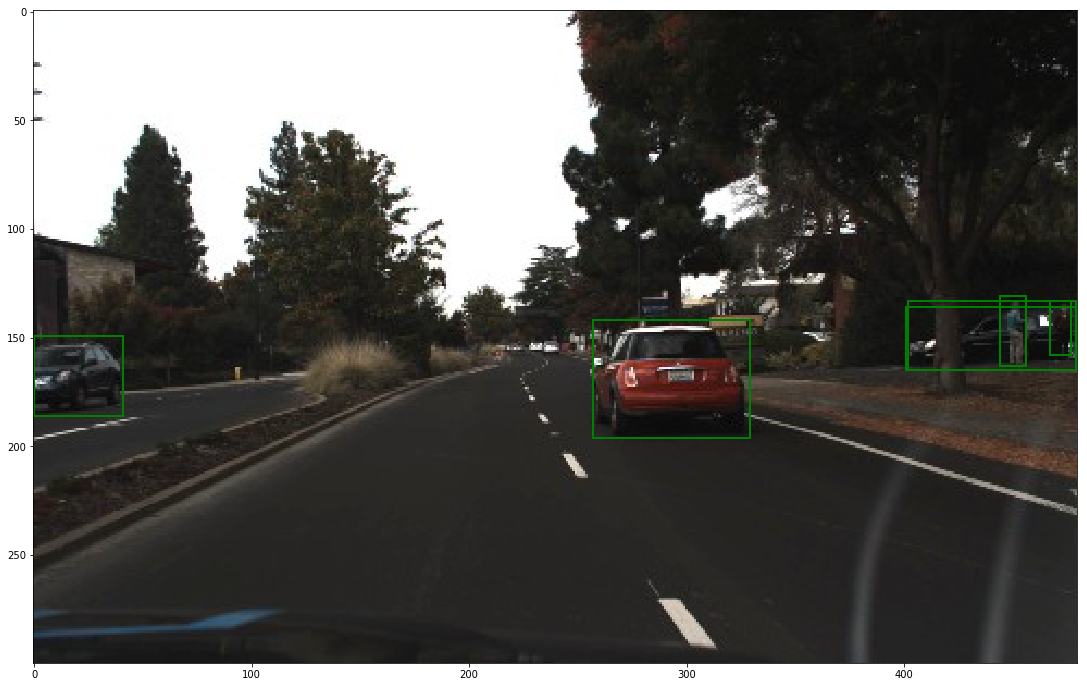

In [0]:
# 5: Draw the predicted boxes onto the image

plt.figure(figsize=(20,12))
plt.imshow(batch_images[i])

current_axis = plt.gca()

colors = plt.cm.hsv(np.linspace(0, 1, n_classes+1)).tolist() # Set the colors for the bounding boxes
classes = ['background', 'car', 'truck', 'pedestrian', 'bicyclist', 'light'] # Just so we can print class names onto the image instead of IDs

# Draw the ground truth boxes in green (omit the label for more clarity)
for box in batch_labels[i]:
    xmin = box[1]
    ymin = box[2]
    xmax = box[3]
    ymax = box[4]
    label = '{}'.format(classes[int(box[0])])
    current_axis.add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='green', fill=False, linewidth=2))  
    #current_axis.text(xmin, ymin, label, size='x-large', color='white', bbox={'facecolor':'green', 'alpha':1.0})

# Draw the predicted boxes in blue
for box in y_pred__dssd_decoded[i]:
    xmin = box[-4]
    ymin = box[-3]
    xmax = box[-2]
    ymax = box[-1]
    color = colors[int(box[0])]
    label = '{}: {:.2f}'.format(classes[int(box[0])], box[1])
    current_axis.add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color=color, fill=False, linewidth=2))  
    current_axis.text(xmin, ymin, label, size='x-large', color='white', bbox={'facecolor':color, 'alpha':1.0})

In [0]:
! cp \ssd7_epoch-01_loss-2.5272_val_loss-10.6123.h5 "/content/gdrive/My Drive"